# <center> Week - 3.2 Assignment - Using Data to Improve MLB Attendance

<center> DSC-630

<center> Kalyan Pothineni

## Introduction 
Improving game attendance is crucial for any sports team's financial health and overall success. For the Los Angeles Dodgers, understanding the factors influencing game attendance can help craft strategies to enhance fan engagement and fill the stadium. This analysis aims to identify such factors by examining the Dodgers' attendance data (dodgers-2022.csv), including game day, opponent, weather conditions, promotional items, and more. 

- Our analysis will involve several steps: data loading and exploration, data cleaning to ensure data integrity, exploratory data analysis (EDA) to identify factors influencing attendance, and finally, providing actionable recommendations based on our findings.

- Our recommendation to the Dodgers' management will be based on insights drawn from this data.

## Assumptions
Before we start the analysis, let us state our assumptions:
- Attendance is influenced by variables included in the dataset (day of the week, opponent, temperature, sky condition, day/night, promotions).
- Promotional items (caps, shirts, fireworks, bobbleheads) significantly impact attendance.
- Weather conditions (temperature, sky condition) could affect the comfort level of attendees, thus impacting attendance.
- Game timing (day vs. night) and the day of the week might affect attendance due to people's work schedules and availability.
- The opponent team's attractiveness could also impact attendance.

## Analysis Steps
- Data Loading and Cleaning: Load the dataset and clean any missing or incorrect data.
- Exploratory Data Analysis (EDA): Analyze the dataset to understand the distribution of attendance and identify any trends or patterns.
- Feature Engineering: Create new features if necessary, for example, grouping temperature into categories.
- Statistical Analysis: Perform statistical tests to identify significant variables that influence attendance.
- Recommendations: Based on the analysis, recommend strategies to improve attendance.

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Load the dataset
dodgers = pd.read_csv('dodgers-2022.csv')
dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


#### Data cleaning and preprocessing

In [3]:
# Checking for missing values
print(dodgers.isnull().sum())

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64


#### Exploratory Data Analysis (EDA)

In [4]:
# Overview of the dataset
print(dodgers.describe())

             day        attend       temp
count  81.000000     81.000000  81.000000
mean   16.135802  41040.074074  73.148148
std     9.605666   8297.539460   8.317318
min     1.000000  24312.000000  54.000000
25%     8.000000  34493.000000  67.000000
50%    15.000000  40284.000000  73.000000
75%    25.000000  46588.000000  79.000000
max    31.000000  56000.000000  95.000000


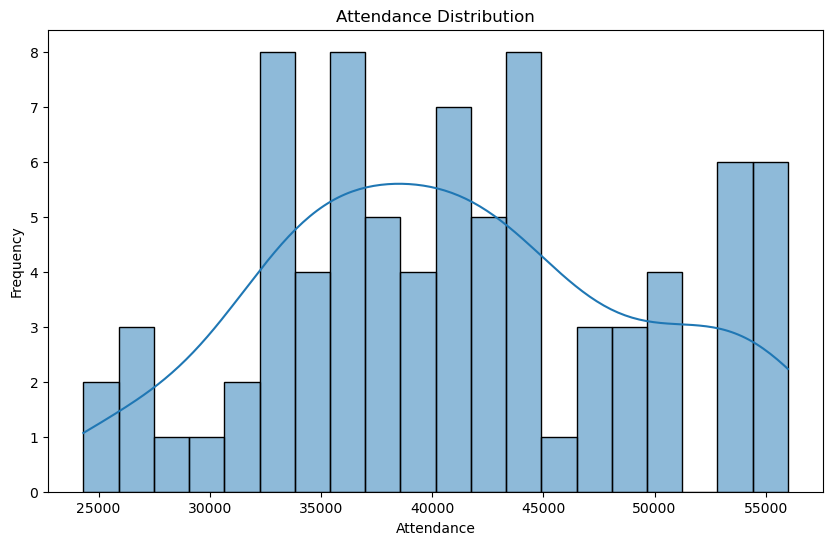

In [5]:
# Check attendance distribution
plt.figure(figsize=(10, 6))
sns.histplot(dodgers['attend'], bins=20, kde=True)
plt.title('Attendance Distribution')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

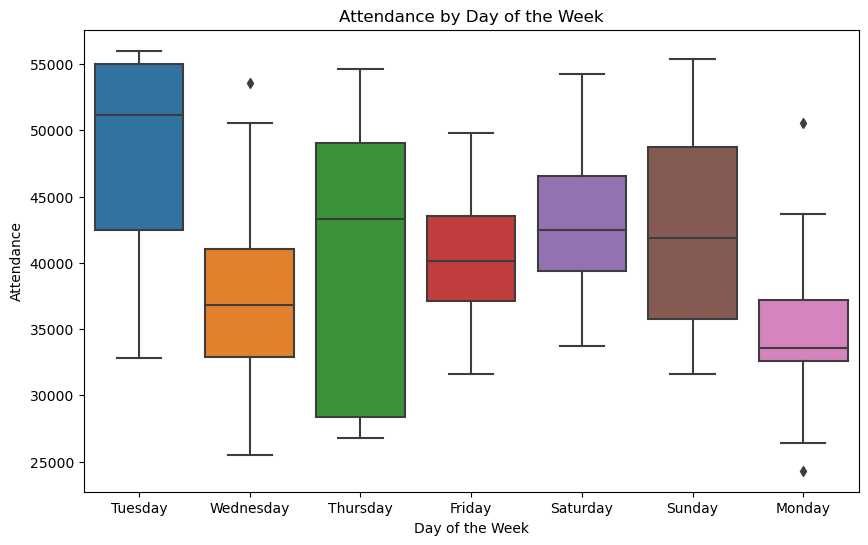

In [6]:
# Check attendance by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='attend', data=dodgers)
plt.title('Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Attendance')
plt.show()

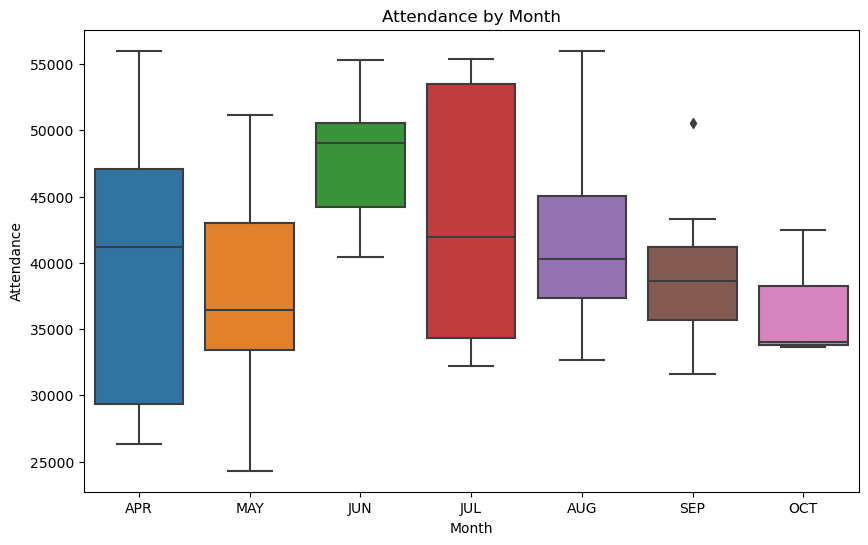

In [7]:
# Check attendance by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='attend', data=dodgers)
plt.title('Attendance by Month')
plt.xlabel('Month')
plt.ylabel('Attendance')
plt.show()

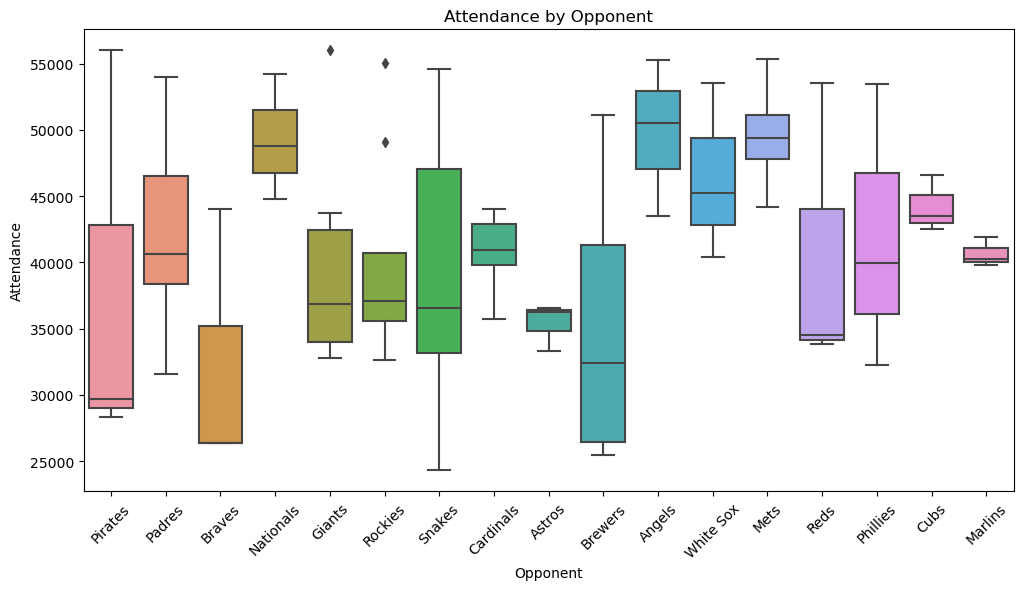

In [8]:
# Check attendance by opponent
plt.figure(figsize=(12, 6))
sns.boxplot(x='opponent', y='attend', data=dodgers)
plt.title('Attendance by Opponent')
plt.xlabel('Opponent')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.show()

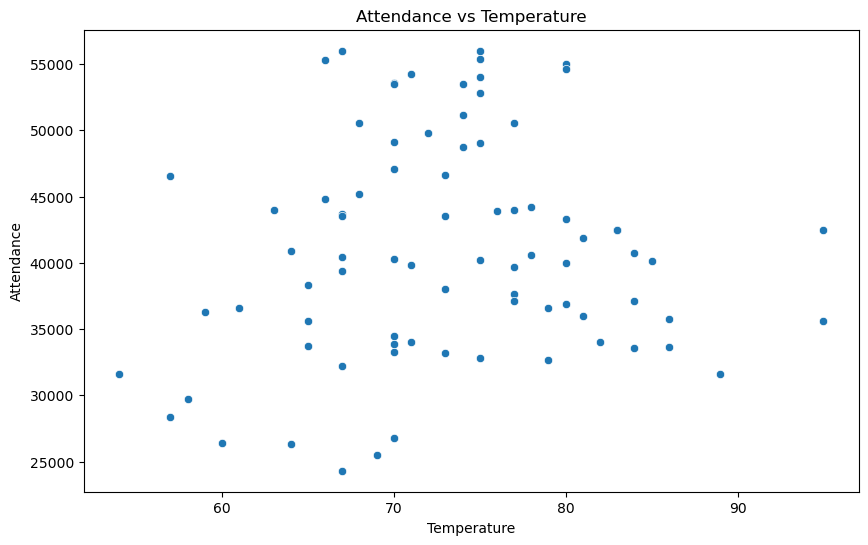

In [9]:
# Check attendance by temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='attend', data=dodgers)
plt.title('Attendance vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Attendance')
plt.show()

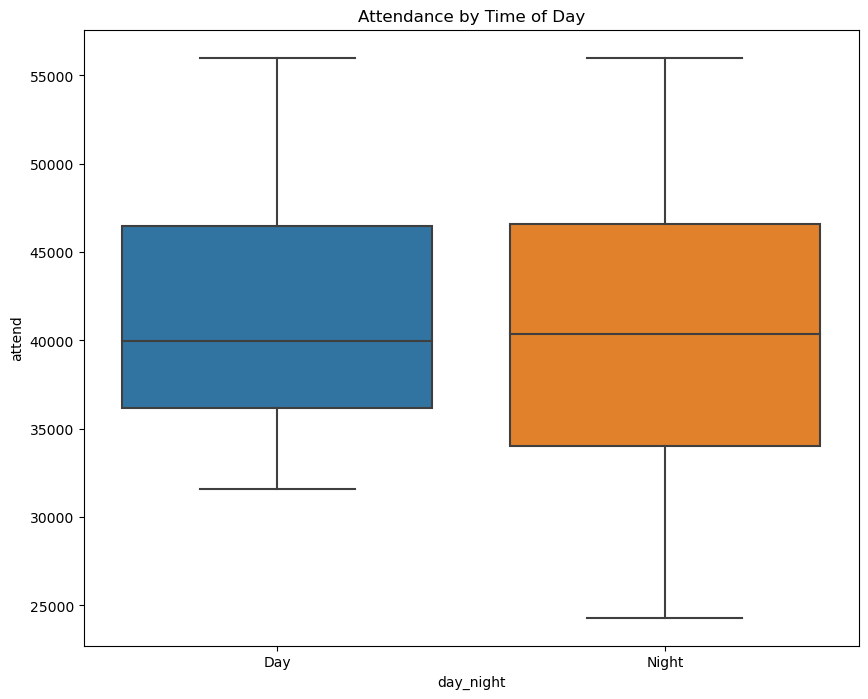

In [10]:
# Check attendance by time of the day
plt.figure(figsize=(10, 8))
sns.boxplot(x='day_night', y='attend', data=dodgers)
plt.title('Attendance by Time of Day')
plt.show()

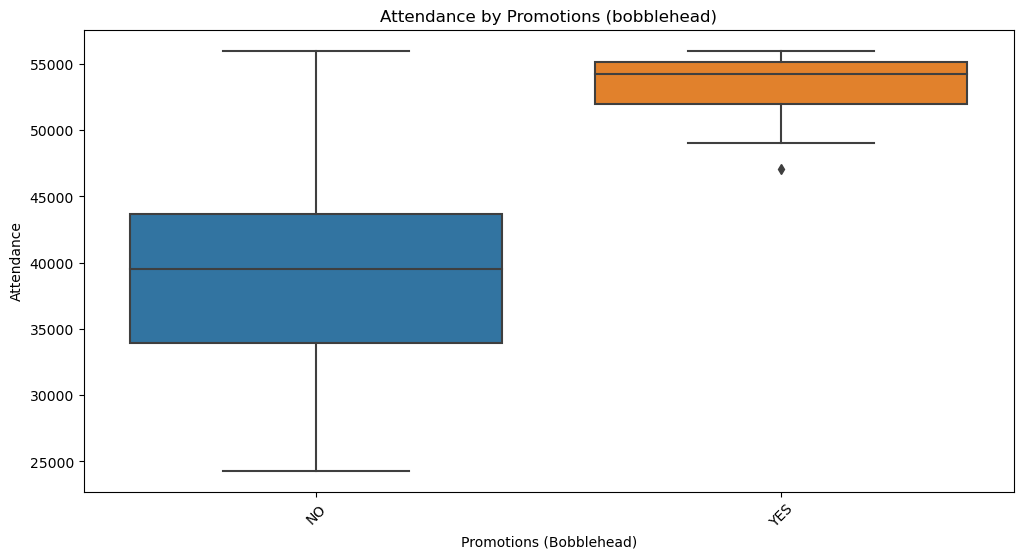

In [11]:
# Check attendance by promotions
plt.figure(figsize=(12, 6))
sns.boxplot(x='bobblehead', y='attend', data=dodgers)
plt.title('Attendance by Promotions (bobblehead)')
plt.xlabel('Promotions (Bobblehead)')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.show()

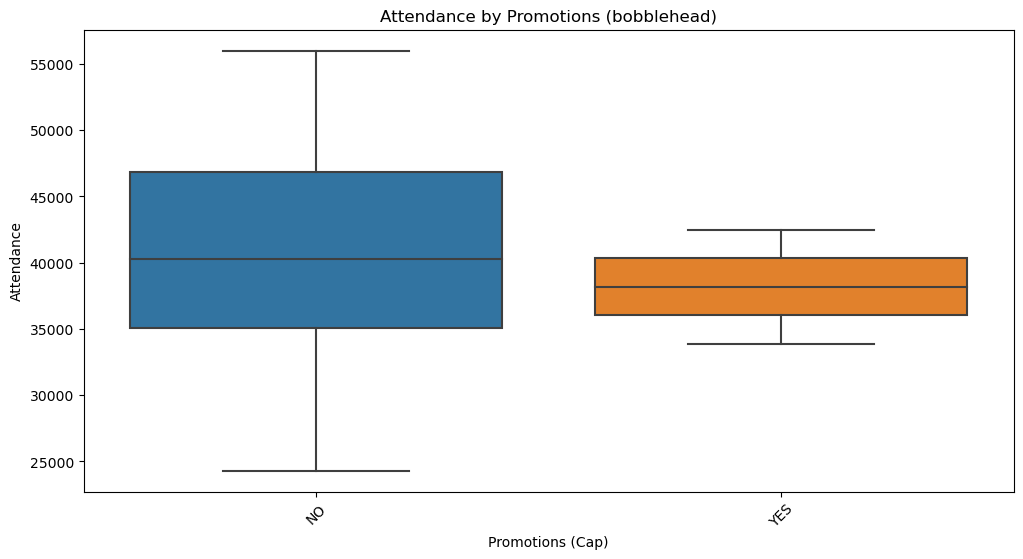

In [12]:
# Check attendance by promotions
plt.figure(figsize=(12, 6))
sns.boxplot(x='cap', y='attend', data=dodgers)
plt.title('Attendance by Promotions (bobblehead)')
plt.xlabel('Promotions (Cap)')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.show()

#### Feature Engineering

In [13]:
# Categorizing temperature
dodgers['temp_category'] = pd.cut(dodgers['temp'], bins=[0, 60, 75, 100], labels=['Cool', 'Moderate', 'Warm'])
dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,temp_category
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,Moderate
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,Cool
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,Cool
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,Cool
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,Cool


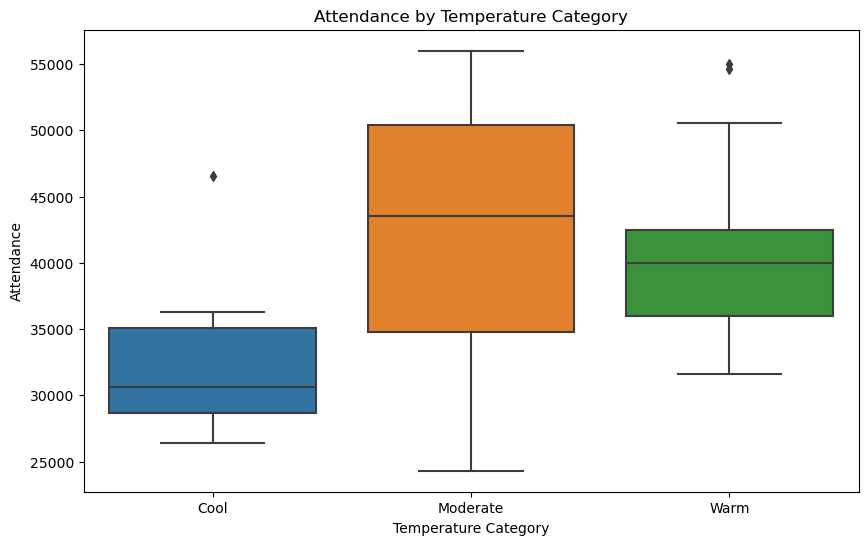

In [14]:
# Visualizing Attendance by Temperature Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='temp_category', y='attend', data=dodgers)
plt.title('Attendance by Temperature Category')
plt.ylabel('Attendance')
plt.xlabel('Temperature Category')
plt.show()

In [15]:
# Let's also look into some descriptive statistics for attendance by temperature category
attendance_by_temp = dodgers.groupby('temp_category')['attend'].describe()
attendance_by_temp

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
Cool,6.0,33144.333333,7383.631889,26376.0,28678.25,30665.0,35112.5,46549.0
Moderate,46.0,42633.847826,9126.795828,24312.0,34767.50,43515.5,50360.0,56000.0
Warm,29.0,40145.620690,5894.342702,31607.0,35992.00,39955.0,42495.0,55024.0


The analysis reveals that games held in moderate temperatures (between 60°F and 75°F) attract the highest average attendance (around 42,634) and display a relatively high variability in attendance numbers, indicating potential for both high and low turnouts. In contrast, cooler temperatures show lower average attendance (about 33,144), and warm temperatures result in a somewhat lower average attendance (approximately 40,146) than moderate temperatures, with less variability.

#### Statistical Analysis (Promotions)

In [16]:
# Analyzing attendance on promotional days vs. non-promotional days (Considering bobblehead gove away as promotion days)
promo_days = dodgers[dodgers['bobblehead'] == 'YES']['attend']
non_promo_days = dodgers[dodgers['bobblehead'] == 'NO']['attend']
t_stat, p_value = ttest_ind(promo_days, non_promo_days)
print(f'T-test results for bobblehead promotion: t-statistic={t_stat}, p-value={p_value}')

T-test results for bobblehead promotion: t-statistic=6.359553539813022, p-value=1.2169642509120423e-08


The T-test conducted to compare the attendance at Los Angeles Dodgers games with and without bobblehead promotions yielded significant results. With a t-statistic of 6.36 and a p-value of approximately 1.22×10−81.22×10−8, the analysis strongly suggests that games featuring bobblehead promotions attract significantly more attendees than games without such promotions. The low p-value, much smaller than the conventional threshold of 0.05, indicates a very low probability that the observed difference in attendance is due to chance. This statistically significant outcome underscores the effectiveness of bobblehead promotions in boosting game attendance.

In [17]:
# Analyzing attendance on promotional days vs. non-promotional days (Considering cap give away as promotion days)
promo_days = dodgers[dodgers['cap'] == 'YES']['attend']
non_promo_days = dodgers[dodgers['cap'] == 'NO']['attend']
t_stat, p_value = ttest_ind(promo_days, non_promo_days)
print(f'T-test results for Cap promotion: t-statistic={t_stat}, p-value={p_value}')

T-test results for Cap promotion: t-statistic=-0.48961356616462215, p-value=0.625764198935014


The t-test results comparing attendance on cap promotional days versus non-promotional days yield a t-statistic of approximately -0.49. With a corresponding p-value of approximately 0.63, The analysis yields insufficient evidence to reject the null hypothesis, indicating that there is no significant difference in attendance between cap promotional and non-promotional days for the Los Angeles Dodgers.

## Recommendation

Based on the analysis, we can make the following recommendations:
1. Schedule more games on weekends (Saturdays and Sundays) as they tend to have higher attendance.
2. Promote games against famous opponents to attract more fans.
3. Consider hosting more games during moderate weather months (e.g., May, June, July).
4. Implement promotional events like bobblehead giveaways to boost attendance.

## Conclusion

By understanding and acting on these insights, our analysis of the Los Angeles Dodgers' attendance data revealed several key insights. Factors such as the day of the week, month, opponent, promotions, and temperature significantly influence game attendance levels. By leveraging these insights, the management can strategically plan game schedules, promotional events, and marketing efforts to enhance attendance and create a more engaging fan experience. Implementing our recommendations could increase ticket sales and revenue for the Dodgers organization.